In [3]:
!pip install missingno

In [9]:
import missingno as msno
import koreanize_matplotlib

In [16]:
df = pd.read_csv('/Users/egg/Downloads/1.CSV',encoding='euc-kr')

<Axes: >

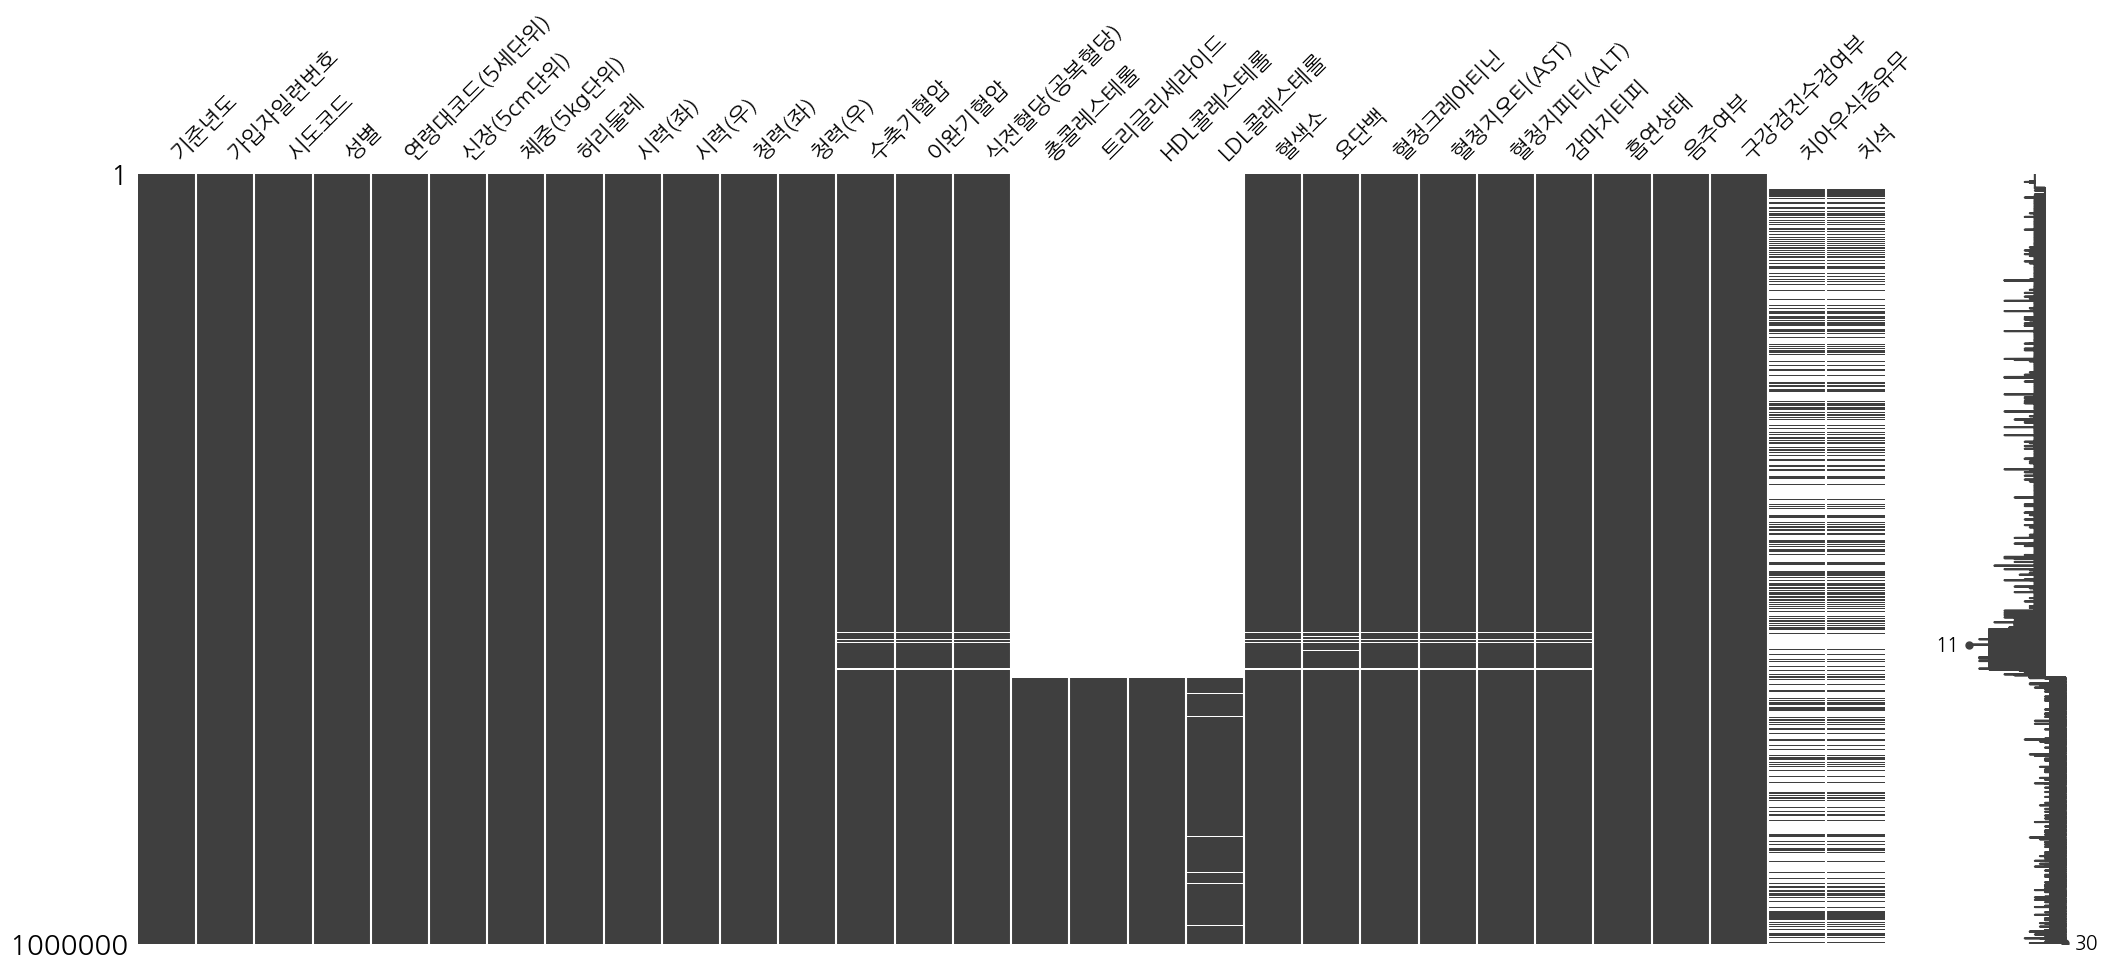

In [10]:
msno.matrix(df)

In [12]:
# 연령대 코드 매핑
age_group_mapping = {
    1: "0-4", 2: "5-9", 3: "10-14", 4: "15-19", 5: "20-24",
    6: "25-29", 7: "30-34", 8: "35-39", 9: "40-44", 10: "45-49",
    11: "50-54", 12: "55-59", 13: "60-64", 14: "65-69", 15: "70-74",
    16: "75-79", 17: "80-84", 18: "85+"
}

In [17]:
df['연령대코드(5세단위)'] = df['연령대코드(5세단위)'].apply(lambda x : age_group_mapping[x])

In [35]:
sample = df.sample(1000)

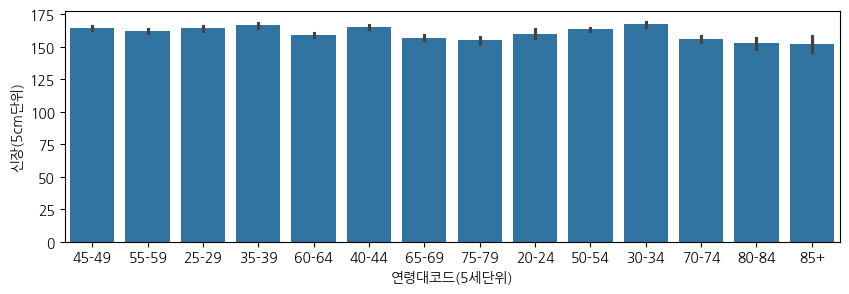

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 3))
sns.barplot(x = '연령대코드(5세단위)',y='신장(5cm단위)',data=sample)
plt.show()

In [ ]:
# order를 변경해줘야함

In [42]:
age_group_mapping.values()

dict_values(['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85+'])

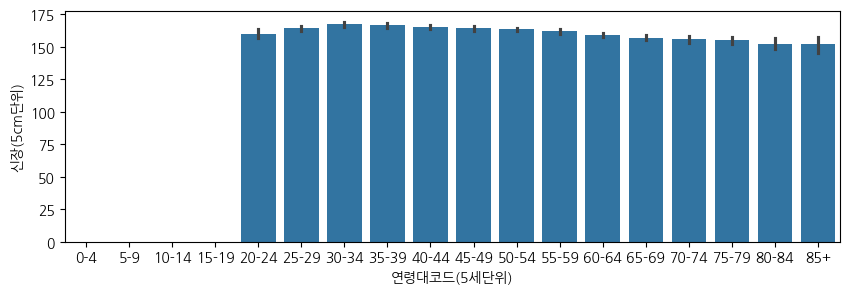

In [44]:
# 방법1
order = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49' \
            , '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85+']
plt.figure(figsize=(10, 3))
sns.barplot(x = '연령대코드(5세단위)',y='신장(5cm단위)',data=sample,order = order)
plt.show()

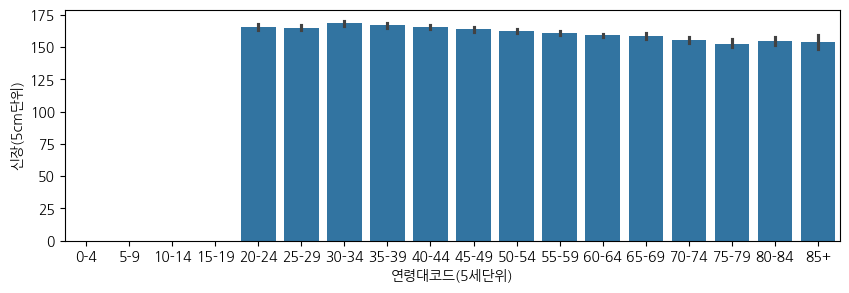

In [45]:
# 방법2 - 데이터프레임에 컬럼을 Categorical(범주)로 변경
order = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49' \
            , '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85+']
df['연령대코드(5세단위)'] = pd.Categorical(df['연령대코드(5세단위)'],ordered=True,
                              categories=order)

# 다시 샘플링
sample = df.sample(1000)

plt.figure(figsize=(10, 3))
sns.barplot(x = '연령대코드(5세단위)',y='신장(5cm단위)',data=sample)
plt.show()

In [20]:
s = df.groupby(['연령대코드(5세단위)'])['신장(5cm단위)'].mean()

<Axes: xlabel='연령대코드(5세단위)'>

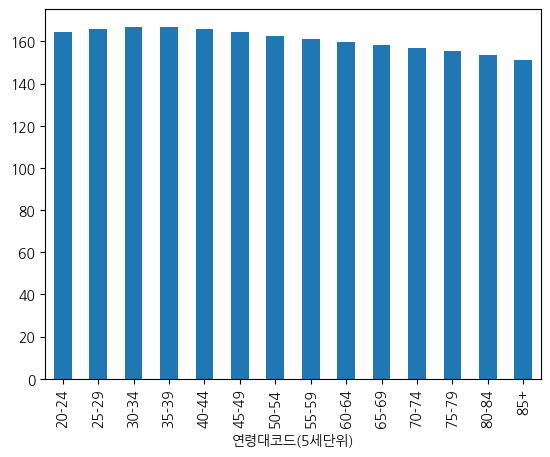

In [22]:
s.plot(kind='bar') # 문제 없음